In [1]:
import tensorflow as tf
import keras
import numpy as np 
import matplotlib.pyplot as plt
import os

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_d = keras.preprocessing.image.ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True, preprocessing_function=keras.applications.vgg19.preprocess_input)

In [4]:
valid_d = keras.preprocessing.image.ImageDataGenerator( preprocessing_function=keras.applications.vgg19.preprocess_input)

In [5]:
train_data = train_d.flow_from_directory("C:\\Users\\Natsu\\Downloads\\archive\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train", batch_size=32, target_size=(255,255))

Found 70295 images belonging to 38 classes.


In [6]:
valid_data = valid_d.flow_from_directory('C:\\Users\\Natsu\\Downloads\\archive\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid', batch_size=32, target_size=(255,255))

Found 17572 images belonging to 38 classes.


In [7]:
img, label = train_data.next()

In [8]:
img.shape

(32, 255, 255, 3)

In [9]:
def plot_image(img, label):
    for img, l in zip(img, label):
        plt.figure(figsize=(10,10))
        plt.imshow(img/255)
        plt.show()
        plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


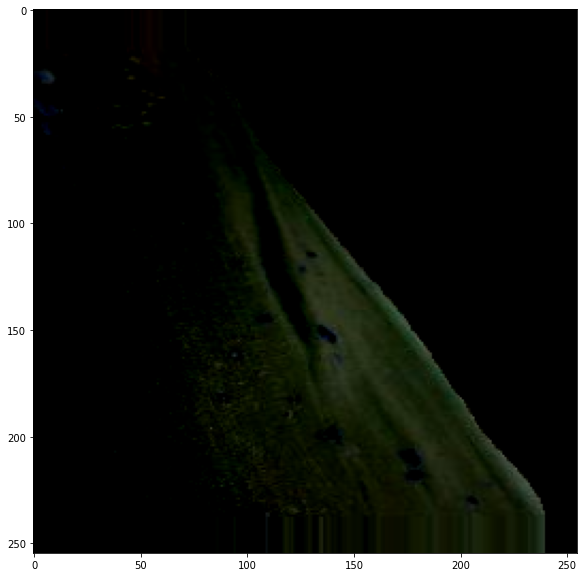

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


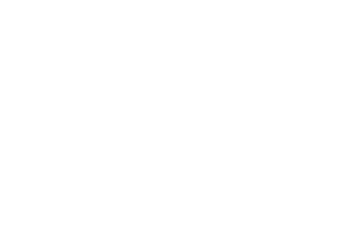

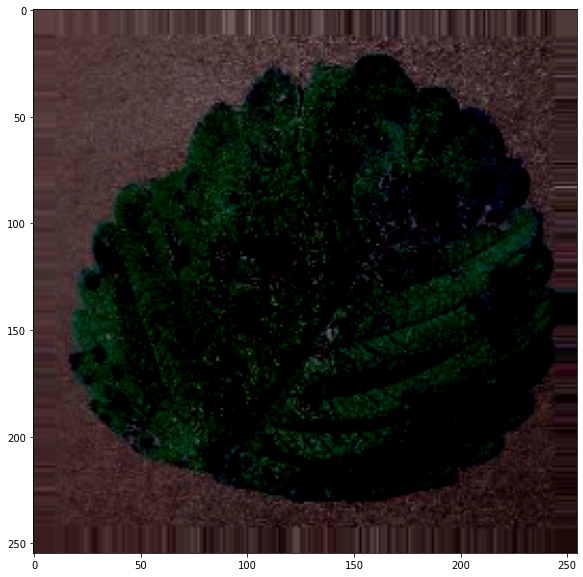

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


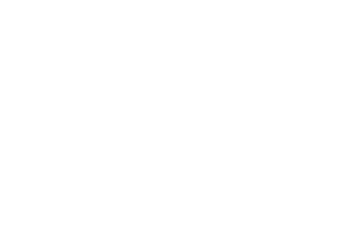

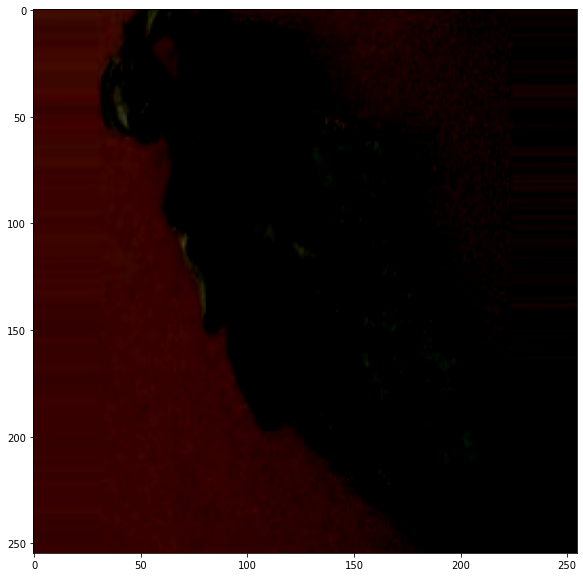

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


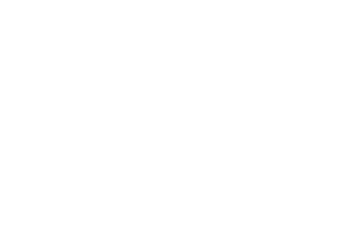

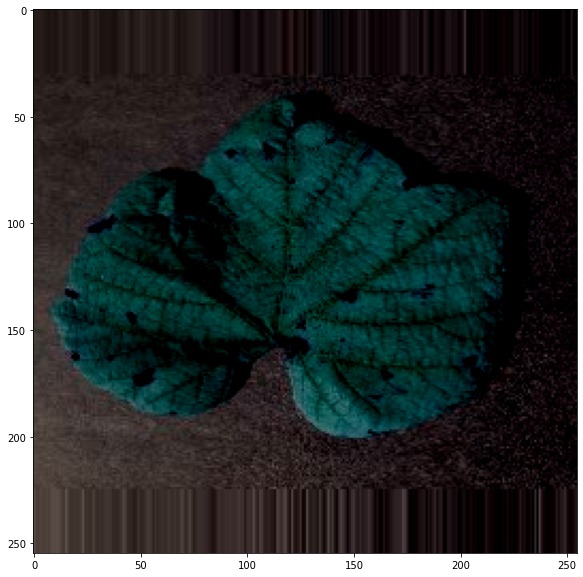

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


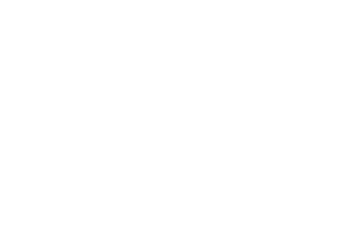

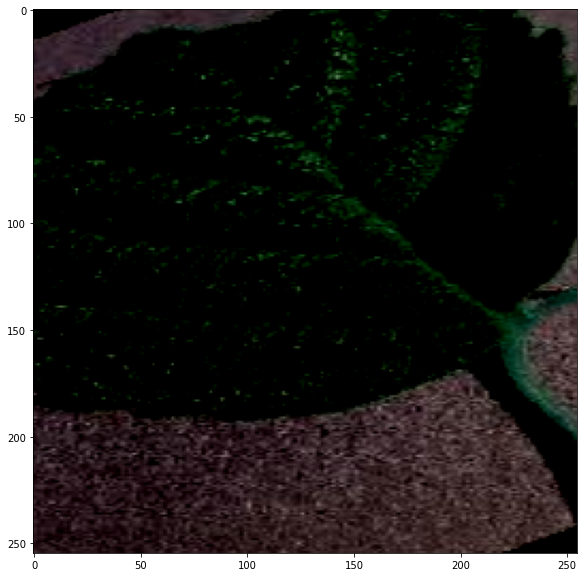

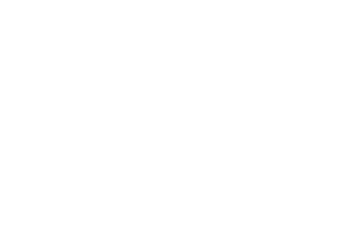

In [10]:
plot_image(img[:5], label[:5])

In [11]:
from keras.applications.vgg19 import VGG19
base_model = VGG19(input_shape=(255, 255, 3), include_top=False)

In [12]:
for layer in base_model.layers:
    layer.trainable = False 

In [13]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 255, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 63, 63, 128)       0     

In [14]:
x = keras.layers.Flatten()(base_model.output)
x = keras.layers.Dense(units=38, activation='softmax')(x)

In [15]:
model = keras.models.Model(base_model.input, x)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 255, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 63, 63, 128)       0     

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Early Stopping and callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1)

#model checkpoint
mc = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', patience=3, min_delta=0.01, verbose=1, save_best_only=True)
cb = [es, mc]

In [24]:
his = model.fit(train_data, epochs=10, callbacks=cb, verbose=1,validation_data=valid_data, batch_size=100 )

Epoch 1/10
2197/2197 [==============================] - ETA: 0s - loss: 5.1239 - accuracy: 0.8865
Epoch 00001: val_accuracy improved from -inf to 0.92095, saving model to best_model.h5
2197/2197 [==============================] - 1200s 546ms/step - loss: 5.1239 - accuracy: 0.8865 - val_loss: 4.8008 - val_accuracy: 0.9210
Epoch 2/10
2197/2197 [==============================] - ETA: 0s - loss: 4.9433 - accuracy: 0.9080
Epoch 00002: val_accuracy improved from 0.92095 to 0.93222, saving model to best_model.h5
2197/2197 [==============================] - 1111s 506ms/step - loss: 4.9433 - accuracy: 0.9080 - val_loss: 4.4225 - val_accuracy: 0.9322
Epoch 3/10
2197/2197 [==============================] - ETA: 0s - loss: 4.6635 - accuracy: 0.9217
Epoch 00003: val_accuracy improved from 0.93222 to 0.94207, saving model to best_model.h5
2197/2197 [==============================] - 1120s 510ms/step - loss: 4.6635 - accuracy: 0.9217 - val_loss: 4.1437 - val_accuracy: 0.9421
Epoch 4/10
2197/2197 [===

In [27]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

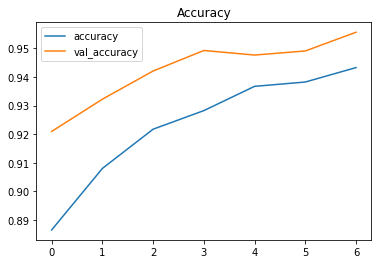

In [30]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.show()

In [31]:
from keras.models import load_model
model = load_model('best_model.h5')

In [36]:
acc = model.evaluate_generator(valid_data)[1]

C:\Users\Natsu\AppData\Local\Temp/ipykernel_9984/2317738720.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(valid_data)[1]


In [37]:
acc

0.9556112289428711

In [42]:
import pathlib
test_dir = pathlib.Path('C:\\Users\\Natsu\\Downloads\\archive\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\test')
test_dir

WindowsPath('C:/Users/Natsu/Downloads/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/test')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
test_gen = ImageDataGenerator(1./255)

#test_d = 'C:\\Users\\Natsu\\Downloads\\archive\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\test'
test_data = test_gen.flow_from_directory(test_dir, batch_size=100, target_size=(255,255))

In [ ]:
model.evaluate(test_data)